Para calcular la función de onda es necesario contar con el valor de $m$ que se obtiene de las condiciones a la frontera. Posteriormente es necesario calcular el valor de $g$

In [1]:
from pylab import *
from scipy.special import *
from scipy.optimize import *


$$
\phi (x) _{in} = \sqrt{\frac{2mV_0}{(1+m)g}} {\rm sn} \left( \sqrt{\frac{2V_0}{1+m}}x +K(m) \right)
$$
$$
\phi(x) _{out} = \frac{1}{a+\sqrt{g}x}
$$


$$
{\rm sn }\left( \sqrt{\frac{2}{1+m}}\xi \right) = \sqrt{m}
$$
con $\xi = \sqrt{V_0}R$

In [5]:
def CoPeg_R(xi,m):
    s,c,d,ph = ellipj(sqrt(2/(1+m))*xi,m)
    f = s-sqrt(m)
    return f

In [9]:
xi = 1.0
m = fsolve(lambda m: CoPeg_R(xi,m),0.0)
m

array([0.68442822])

$$
\frac{g}{2\sqrt{V_0}} = -\sqrt{\frac{2}{1+m}} E\left(\sqrt{\frac{2V_0}{1+m}}R | m \right) + \frac{2}{1+m} \sqrt{V_0}R +\sqrt{2m}
$$

In [8]:
def g_val(m,xi):
    arg = sqrt(2/(1+m))*xi
    valor_g = -sqrt(2/(1+m))*ellipkinc(arg,m)
    valor_g += (2/(1+m))*xi + sqrt(2*m)
    return valor_g

In [10]:
g = g_val(m,xi)
g

array([0.99140103])

Valor de 
$$
a=\sqrt{g} \left( \frac{1+m}{\sqrt{2m V_0}} - R \right) = \sqrt{g} R \left( \frac{1+m}{\sqrt{2m V_0}R} - 1 \right)
$$ 

In [13]:
def a_val(m,xi,g):
    valor_a = sqrt(g)*( ((1+m)/(sqrt(2*m)*xi)) - 1 )
    return valor_a

In [14]:
a = a_val(m,xi,g)
a

array([0.43781056])

In [57]:
def func_onda(x,m,g,a):
    phi = np.zeros((len(x)))
    K_de_m = ellipk(m)
    for i in range(len(x)):
        if x[i] <= -1:
            phi[i] = 1/(a-sqrt(g)*x[i])
        elif -1 < x[i] <= 1:
            phi[i] = sqrt((2*m)/((1+m)*g))*ellipj(sqrt(2/(1+m))*x[i] + K_de_m,m)[0]
        elif x[i] > 1:
            phi[i] = 1/(a+sqrt(g)*x[i])
    return phi

In [58]:
%matplotlib inline

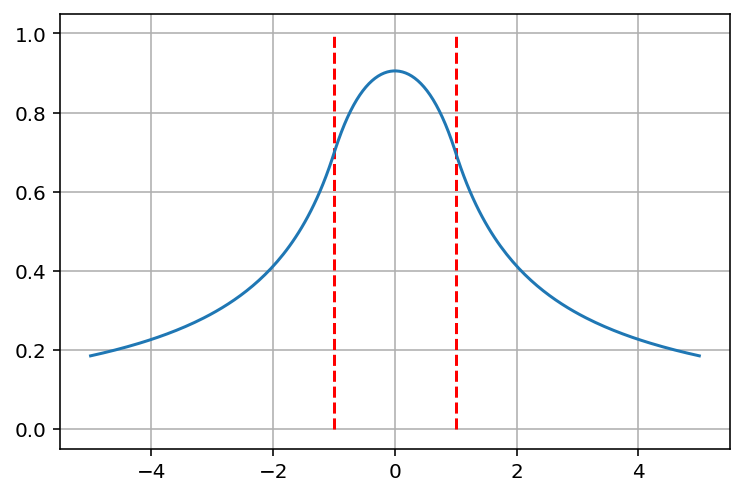

In [60]:
x = linspace(-5,5,200)
y = func_onda(x,m,g,a)
plot(x,y)
vlines(-1,0,1,color="red",linestyles="dashed")
vlines(1,0,1,color="red",linestyles="dashed")
grid()
show()